In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(
    n_samples=20, n_features=3, random_state=1, noise=1)

feature_names = ['f_' + str(i) for i in range(3)]

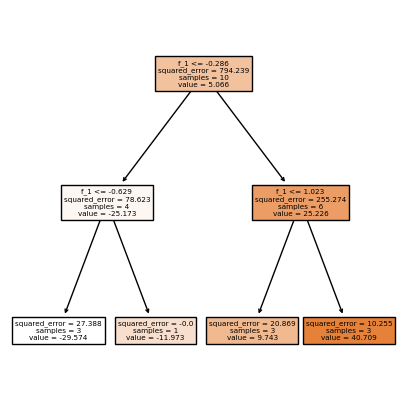

In [4]:
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(
    criterion='squared_error', splitter='best', max_depth=2)

dt.fit(X,y)
plt.figure(figsize=(5,5))
plot_tree(dt, filled=True, feature_names=feature_names)
plt.show()

In [32]:
import numpy as np

class TreeNode():
    def __init__(self, level=None):
        self.n_samples = 0
        self.samples_idex = []
        self.level = level
        
        self.left_node = None 
        self.right_node = None
        
        self.split_feature = None
        self.split_threshold = None 
        self.split_score = float('inf')  #variance reduction
        self.variance = float
        self.left_pred = None
        self.right_pred = None 

class TreeRegressor:
    def __init__(self, max_depth = 1, splitter='mse', min_samples=2):
        self.max_depth = max_depth
        self.splitter = splitter
        self.root = None
        self.min_samples = min_samples
        
    def _calculate_variance(self, y):
        _mean = np.mean(y)
        _variance = np.mean((y - _mean)**2)
        return _variance
    
    def split_dataset(self, X, y, feature_index,threshold):
        """ X: (n, m)"""
        left_X, left_y, right_X, right_y = [], [], [], [] 
        m = len(y)
        for i in range(m):
            if X[feature_index][i] < threshold:
                left_X.append(X[:,i])
                left_y.append(y[i])
            else: 
                right_X.append(X[:,i])
                right_y.append(y[i])
        return np.array(left_X).T, np.array(left_y), np.array(right_X).T, np.array(right_y)
    
    def _calculate_thresholds(self, X, feature_index):
        m = len(X[0])
        thresholds = []
        sorted_X = sorted(X[feature_index])
        for i in range(m-1):
            thresholds.append((sorted_X[i+1] + sorted_X[i])/2)
        return thresholds
    
    def find_best_split(self, root: TreeNode, X, y):
        # code here: find best features to split 
        n = len(X) # number of featurs. X => (n, m)
        initial_variance = root.variance
        best_variance_reduction = 0
        best_feature_index = None 
        best_threshold = None
        best_variance = None 
        total_n_samples = root.n_samples
        
        for feature_index in range(n):
            thresholds = self._calculate_thresholds(X, feature_index)
            for threshold in thresholds:
                left_X, left_y, right_X, right_y = self.split_dataset(
                    X, y, feature_index, threshold)
                left_m, right_m = len(left_y), len(right_y)
                if right_m == 0 or right_m == 0:
                    continue
                
                left_weight = left_m / total_n_samples
                right_weight = right_m / total_n_samples
                
                new_variance =(
                    self._calculate_variance(left_y)*left_weight + 
                    self._calculate_variance(right_y)*right_weight)
                new_variance_reduction = initial_variance - new_variance
                if new_variance_reduction > best_variance_reduction:
                    best_variance_reduction = new_variance_reduction
                    best_feature_index = feature_index
                    best_threshold = threshold
                    best_variance = new_variance 

        return (best_feature_index, best_threshold, 
                best_variance_reduction, best_variance)

    def split_node(self, root: TreeNode, X, y): 
        root.split_feature, root.split_threshold, root.split_score, root.variance = (
            self.find_best_split(root, X, y))
        
        left_X, left_y, right_X, right_y = [], [], [], []
 
        if root.split_feature:
            left_X, left_y, right_X, right_y = self.split_dataset(
                X, y, root.split_feature, root.split_threshold)

        return left_X, left_y, right_X, right_y
 
    
    def build_tree(self, root: TreeNode, X, y):
        if (
            not root or 
            root.level > self.max_depth or 
            len(y) < self.min_samples):
            return 
        
        root.n_samples = len(y)
        root.variance = self._calculate_variance(y)
        
        left_X, left_y, right_X, right_y = self.split_node(root, X, y)

        root.left_node = self.build_tree(TreeNode(level=root.level + 1), left_X, left_y)
        root.right_node = self.build_tree(TreeNode(level=root.level + 1), right_X, right_y)
        print(
            f"""Level: {root.level}
            ,  SplitFeature: {feature_names[root.split_feature]}
            ,  Thredhold: {root.split_threshold:0.2f}
            ,  Variance: {root.variance:0.2f}
            ,  sample size: {root.n_samples}""")
        return root 
    
    def train(self, X, y):
        """
        X: (feaure, samples)
        y: (samples)
        """
        X = X.T
        root = TreeNode(level=0)
        self.root = self.build_tree(root, X, y)

tree = TreeRegressor(max_depth=2)
print(X.shape)
tree.train(X, y)

        

(20, 3)
Level: 1
            ,  SplitFeature: f_0
            ,  Thredhold: 0.02
            ,  Variance: 1227.72
            ,  sample size: 13
Level: 2
            ,  SplitFeature: f_0
            ,  Thredhold: -0.51
            ,  Variance: 0.08
            ,  sample size: 3
Level: 2
            ,  SplitFeature: f_1
            ,  Thredhold: 0.59
            ,  Variance: 93.58
            ,  sample size: 4
Level: 1
            ,  SplitFeature: f_2
            ,  Thredhold: 0.92
            ,  Variance: 169.42
            ,  sample size: 7
Level: 0
            ,  SplitFeature: f_2
            ,  Thredhold: 0.08
            ,  Variance: 1951.05
            ,  sample size: 20


1


In [70]:
a = np.arange(10*3).reshape(10,3)
print(a.shape)
a = a.T
print(a.shape)

(10, 3)
(3, 10)


In [75]:
len(a[0])

10